**Objective**
<br>To leverage the real-time sensor data in detecting potential water supply failures and take quick action to reduce water usage disruption.

Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import os
import random
from sklearn.model_selection import train_test_split
from google.colab import drive

In [ ]:
def classifiers(X_gdata,Y_gdata):
    import matplotlib.pyplot as plt
    
    knn_Accuracy = KNN(X_gdata,Y_gdata)
    NB_Accuarcy = NB(X_gdata,Y_gdata)
    SVM_Accuracy = SVM(X_gdata,Y_gdata)
    DTree_Accuracy = DTree(X_gdata,Y_gdata)
    RF_Accuracy = RF(X_gdata,Y_gdata)
    Accuracy_list = [knn_Accuracy,NB_Accuarcy,SVM_Accuracy,DTree_Accuracy,RF_Accuracy] ##Storing all accuracies ##
    Accuracy_list_names = ['KNN','NB','SVM','DT','RF'] 
    plt.bar(Accuracy_list_names,Accuracy_list,width=0.3) ##Plotting bar graph ##
    plt.show()


def KNN(X_gdata,Y_gdata):
    from sklearn.model_selection import train_test_split
    from sklearn.preprocessing import LabelEncoder
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    from sklearn.metrics import accuracy_score
    encode_data = LabelEncoder()
    (X_train, X_test, Y_train, Y_test) = train_test_split(X_gdata, Y_gdata, test_size=0.2)
    y_gdata_prediction = encode_data.fit_transform(Y_gdata)
    rmse = []
    for k in range(20):
        k = k + 1
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_gdata, y_gdata_prediction)
        pred = knn.predict(X_gdata)
        mean_error = mean_squared_error(y_gdata_prediction, pred)
        rmse.append(sqrt(mean_error))
        
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, Y_train)
    knn_y_pred = knn.predict(X_test)
    Accuracy = accuracy_score(Y_test, knn_y_pred)

    return Accuracy

def NB(X_gdata, Y_gdata):
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import accuracy_score
    (X_train, X_test, Y_train, Y_test) = train_test_split(X_gdata, Y_gdata, test_size=0.2)
    naive_b = GaussianNB()
    naive_b.fit(X_train,Y_train)
    y_pred = naive_b.predict(X_test)
    Accuracy = accuracy_score(Y_test,y_pred)

    return Accuracy


def SVM(X_gdata, Y_gdata):
    from sklearn.model_selection import train_test_split
    from sklearn import svm
    from sklearn.metrics import accuracy_score
    (X_train, X_test, Y_train, Y_test) = train_test_split(X_gdata, Y_gdata, test_size=0.2)
    svm_c = svm.SVC()
    svm_c.fit(X_train, Y_train)
    y_pred = svm_c.predict(X_test)
    Accuracy = accuracy_score(Y_test, y_pred)

    return Accuracy

def DTree(X_gdata,Y_gdata):
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import accuracy_score
    (X_train, X_test, Y_train, Y_test) = train_test_split(X_gdata, Y_gdata, test_size=0.2)
    decision_t = DecisionTreeClassifier()
    decision_t.fit(X_train,Y_train)
    y_pred = decision_t.predict(X_test)
    Accuracy = accuracy_score(Y_test, y_pred)
    return Accuracy

def RF(X_gdata,Y_gdata):
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    (X_train, X_test, Y_train, Y_test) = train_test_split(X_gdata, Y_gdata, test_size=0.2)
    random_f = RandomForestClassifier()
    random_f.fit(X_train,Y_train)
    y_pred = random_f.predict(X_test)
    Accuracy = accuracy_score(Y_test,y_pred)

    return Accuracy 

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path=os.path.join(os.getcwd(),'drive','MyDrive','Colab Notebooks','sensor.csv')
input_df=pd.read_csv(file_path)


Exploratory Data Analysis

In [ ]:
print(input_df.shape)

(220320, 55)


In [ ]:
print(input_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      220320 non-null  int64  
 1   timestamp       220320 non-null  object 
 2   sensor_00       210112 non-null  float64
 3   sensor_01       219951 non-null  float64
 4   sensor_02       220301 non-null  float64
 5   sensor_03       220301 non-null  float64
 6   sensor_04       220301 non-null  float64
 7   sensor_05       220301 non-null  float64
 8   sensor_06       215522 non-null  float64
 9   sensor_07       214869 non-null  float64
 10  sensor_08       215213 non-null  float64
 11  sensor_09       215725 non-null  float64
 12  sensor_10       220301 non-null  float64
 13  sensor_11       220301 non-null  float64
 14  sensor_12       220301 non-null  float64
 15  sensor_13       220301 non-null  float64
 16  sensor_14       220299 non-null  float64
 17  sensor_15 

In [ ]:
input_df.describe()

,Unnamed: 0,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,220320.000000,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,220301.000000,220301.000000,220301.000000,220301.000000,220299.000000,0.0,220289.000000,220274.000000,220274.000000,220304.000000,220304.000000,220304.000000,220279.000000,220304.000000,220304.000000,220284.000000,220300.000000,220304.000000,220304.000000,220248.000000,220059.000000,220304.00000,220252.000000,220304.000000,220304.000000,220304.000000,220304.000000,220304.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,110159.500000,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,41.470339,41.918319,29.136975,7.078858,376.860041,NaN,416.472892,421.127517,2.303785,590.829775,360.805165,796.225942,459.792815,922.609264,556.235397,649.144799,786.411781,501.506589,851.690339,576.195305,614.596442,863.32310,804.283915,486.405980,234.971776,427.129817,593.033876,60.787360,49.655946,36.610444,68.844530,35.365126,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,63601.049991,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,12.093519,13.056425,10.113935,6.901755,113.206382,NaN,126.072642,129.156175,0.765883,199.345820,101.974118,226.679317,154.528337,291.835280,182.297979,220.865166,246.663608,169.823173,313.074032,225.764091,195.726872,283.54476,260.602361,150.751836,88.376065,141.772519,289.385511,37.604883,10.540397,15.613723,21.371139,7.898665,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,0.000000,0.000000,0.000000,0.000000,32.409550,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,95.527660,0.000000,0.000000,0.000000,0.000000,43.154790,0.000000,4.319347,0.636574,0.000000,23.95833,0.240716,6.460602,54.882370,0.000000,2.260970,0.000000,24.479166,19.270830,23.437500,20.833330,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,55079.750000,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,40.705260,38.856420,28.686810,1.538516,418.103250,NaN,459.453400,454.138825,2.447542,662.768975,398.021500,875.464400,478.962600,950.922400,601.151050,693.957800,790.489575,448.297950,782.682625,518.947225,627.777800,839.06240,760.607475,489.761075,172.486300,353.176625,288.547575,28.799220,45.572910,32.552080,57.812500,32.552080,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,110159.500000,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,44.291340,45.363140,32.515830,2.929809,420.106200,NaN,462.856100,462.020250,2.533704,665.672400,399.367000,879.697600,531.855900,981.925000,625.873500,740.203500,861.869600,494.468450,967.279850,564.872500,668.981400,917.70830,878.850750,512.271750,226.356050,473.349350,709.668050,64.295485,49.479160,35.416660,66.406250,34.895832,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,165239.250000,2.499826,49.479160

Checking for Missing values

In [ ]:
print(input_df.isnull().sum())

Unnamed: 0             0
timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16


Removing the columns which have maximum number of empty cells

In [ ]:
input_df.drop(['Unnamed: 0', 'timestamp','sensor_00','sensor_15','sensor_50','sensor_51'],axis=1, inplace=True)

Since the sensor data has many empty cells, which could be due to mal-function or network connectivity, if there is no flow of water we see zero in the dataset and we found so many empty cells as shown above we will fill it with mean values

In [ ]:
for column in input_df.columns:
  if 'sensor' in column:
    try:
      temp_mean=input_df[column].mean()
    except:
      temp_mean=0
    if np.isnan(temp_mean):
      temp_mean=0
    
    input_df[column].replace(np.nan,temp_mean,inplace=True)
    

Testing if we are able to fill all the null values in the dataset

In [ ]:
print(input_df.isnull().sum())

sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
machine_status    0
dtype: int64


Checking for duplicate data - Since we have so many records we need to check if there exists any duplicate data. Upon executing below statement we can check the count of duplicate reports

In [ ]:
duplicate=input_df.duplicated()
print(duplicate.sum())

2876


In [ ]:
target_df=input_df['machine_status']
input_df.drop(['machine_status'],axis=1,inplace=True)

In [ ]:
X=np.array(input_df)
y=np.array(target_df)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random.randint(1,1000))

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(176256, 48) (44064, 48) (176256,) (44064,)


Next we test the classification algorithms using Raw Data, Stadardized data and Normalized data, observe accuracy, precision, recall and f1 score and decide the final model for our web application

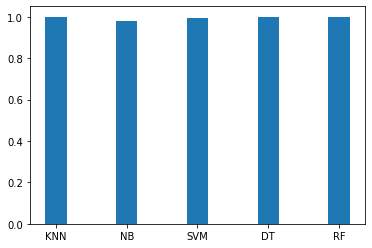

In [ ]:
classifiers(X_train,y_train)

Upon evaluating the aforementioned classification machine learning algorithms, we find random forest algorithm has the highest accuracy, hence we will create a model using it.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_f = RandomForestClassifier()
random_f.fit(X_train,y_train)
y_pred = random_f.predict(X_test)
Accuracy = accuracy_score(y_test,y_pred)
print(Accuracy)

0.9999092229484386


In [ ]:
for i in range(0,len(X_test)):
  print(X_test[i],y_pred[i])
  if i==10:
    break

[  49.91319      52.82117844   45.22569     634.60644531   68.35483
   14.96672      16.6522       15.53096      15.48032      46.33294
   53.41107      37.00311      16.5216      420.3406      461.2589
  460.4208        2.524661    664.7361      399.5622      878.9539
  531.4828     1084.917       626.7679      721.9073      897.2914
  559.6244      751.9668      575.7001      689.8148      878.6458
  960.415       537.5729      196.5222      504.2348      880.2547
    7.480574     48.4375       39.32291      96.875        31.77083
   34.11458206   50.78125      44.56018      41.95602      51.21528
   38.77314758  253.1829       63.65741   ] NORMAL
[  49.91319275   50.9982605    45.39930344  637.8472       68.52064
   15.0897       16.70284      15.65393      15.05353      39.02545
   51.32674      38.23664      11.57274     420.5026      462.574
  494.3902        2.899188    675.7789      405.3541      890.9136
  540.9572     1105.354       606.6443      699.9037      795.1422
  176.

In [ ]:
import pickle

filename = 'random_forest.sav'
pickle.dump(random_f, open(filename, 'wb'))